# BL40A2030 Wireless Communication Networks

## Week 1: Introduction to Jupyter NB

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Plot in pyhton

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

This first cell imports the libraries to be used in the tutorial. Everytime that you use a command related to numpy you need to use a *np.*. Likewise, whenever you call a command from matplotlib you use *plt.*.

We call a plot style so every plot has a default template and another library is to cut the warning messages (usually annoying).

## Basic commands

- Define a vector with timesteps
- Compute a sine and a cosine using this time steps
- Plot it

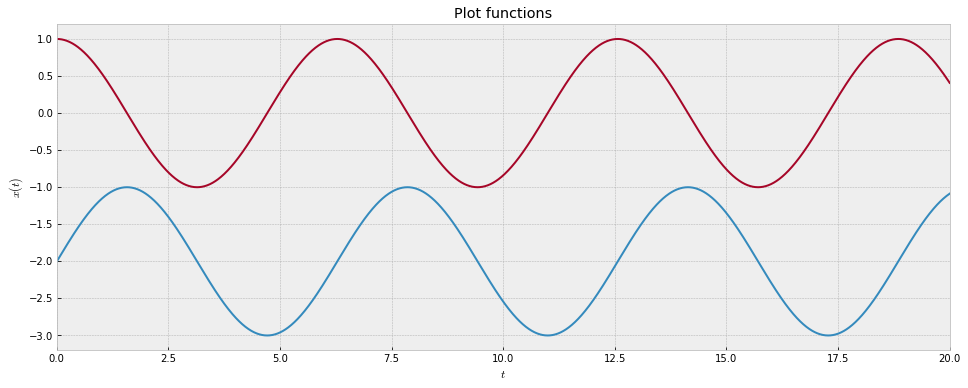

In [2]:
#Example 1
t = np.linspace(0, 20, 2000) # t is defined from 0 to 20 with 2000 points
plt.figure(figsize=(16,6)) 
plt.plot(t, np.sin(t)-2)
plt.plot(t, np.cos(t))
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('Plot functions')
plt.xlim([0, 20])
plt.grid(True)
plt.show()

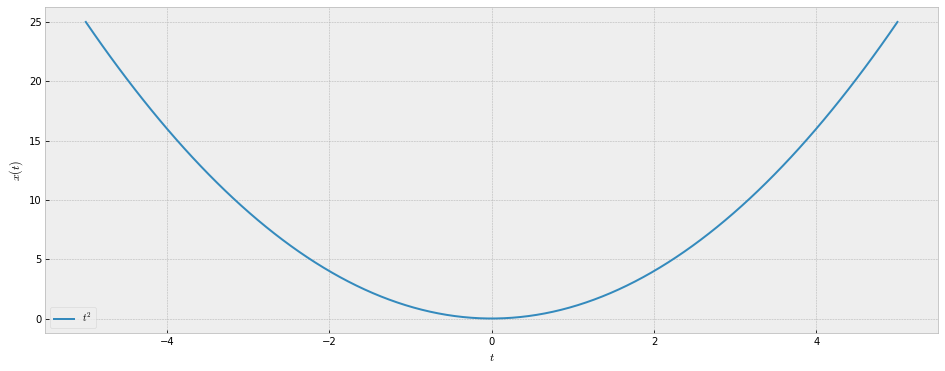

In [3]:
#Example 2
t = np.linspace(-5, 5, 100) # t is defined from -5 to 5 with 100 points
plt.figure(figsize=(16,6)) 
plt.plot(t, t**2,label='$t^2$')
#plt.plot(t, 1/3 * t**3, label='$t^3/3$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.legend()
plt.show()

### Try yourself:
- Plot: $e^{-t}$ and $\log_2 t$
- Use $t$ between 0 and 4 with 100 steps

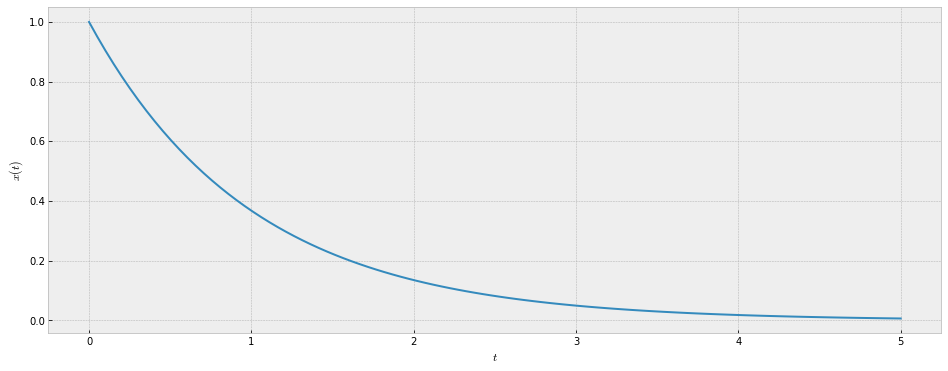

In [4]:
#Example 2
t = np.linspace(0, 5, 100) # t is defined from -5 to 5 with 100 points
plt.figure(figsize=(16,6)) 
plt.plot(t, np.exp(-t))
#plt.plot(t, 1/3 * t**3, label='$t^3/3$')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid(True)
plt.show()

## Experiments using random variables

Let us make a computer experiment to simulate when someone throws a coin.

### Defining the function of throwing the coin

In [5]:
def flip(p):
    return 'H' if np.random.random() < p else 'T'

In this case $p$ is the probability of being Head, so that Tail is $1-p$. If $p=0.5=50\%$, this is a fair coin, otherwise is a biased coin.

- Experiment 1: 1 trial
- Experiment 2: 10 trials
- Experiment 3: 10000 trials
- Get from experiment 3 the frequency that H and T appears
- Compare this with the *bias* probability

In [6]:
### Experiment 1
p=0.65 
flip(p)

'T'

In [7]:
### Experiment 2 - 10 trials

a = [None] * 10 #create an empty list with 10 elements
for i in range(10):
    a[i]=flip(p)
print(a)

['H', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'T']


In [8]:
### Experiment 3 - Empirical probability based on frequency

#Number o realizations
x_max = 10000
count = 0
#Experiment
for x in range(0, x_max):
    a = flip(p)
    #print a
    if a == 'H':
        count = count + 1
print('Number of heads:', count)
print('Number of tails:', x_max - count)

Number of heads: 6569
Number of tails: 3431


In [9]:
#Probability from experiments: Number of Heads or Tails diveded by the number of realizations
print('Empirical frequency')
print('Probability (heads):', count / x_max)
print('Probability (tails):', (x_max-count) / x_max)
print('Bias probability')
print('Probability (heads):', p)
print('Probability (tails):', 1-p)

Empirical frequency
Probability (heads): 0.6569
Probability (tails): 0.3431
Bias probability
Probability (heads): 0.65
Probability (tails): 0.35


### Try yourself:
- set $p=0.85$ and $p=0.05$
- run the experiments and check what happens

## Generate Poisson random variables

- Not explaining what is a Poisson random variable now
- The idea is that during a fixed period of time, discrete events happens
- The number of events in each period is independent
- The only parameter needed is the expected value of how many packets will arrive in a given period
- First experiment: We will generante an array with 10 numbers with mean of 4 packets per period.
- Second experiment: Array with 10000 with means 2 and 4 and draw a histogram

In [10]:
#Simulating Poisson distribution with mean 4
mean=4
samples = np.random.poisson(mean, 10)
print(samples)

[4 3 6 5 5 9 4 8 5 2]


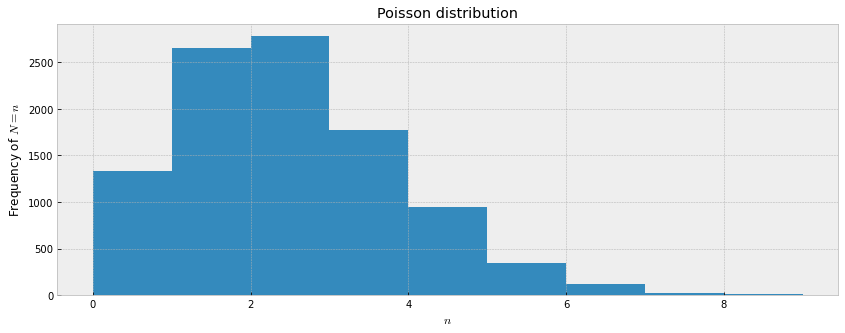

In [11]:
### Drawing a histogram (empirical distribution)
mean=2
samples_mean2 = np.random.poisson(mean, 10000)
n_bins2 = np.max(samples_mean2)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean2,n_bins2)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show() 

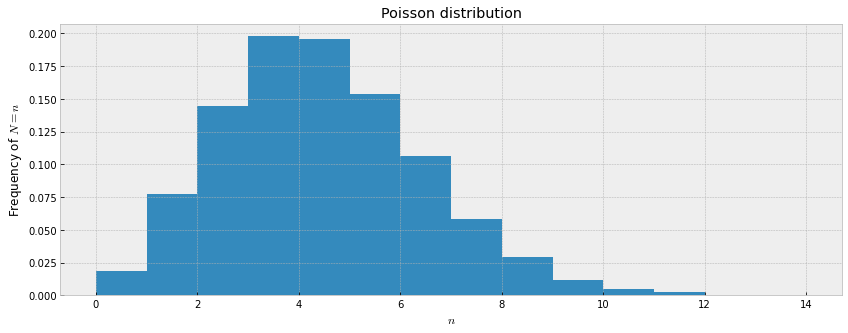

In [12]:
mean=4
samples_mean4 = np.random.poisson(mean, 10000)
n_bins4 = np.max(samples_mean4)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean4,n_bins4,density=True)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

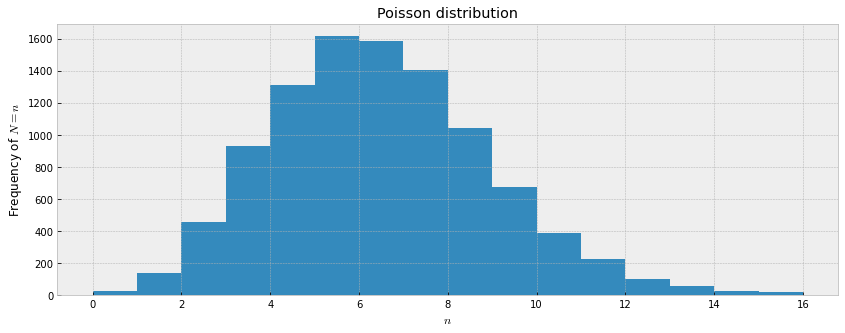

In [13]:
mean=6
samples_mean6 = np.random.poisson(mean, 10000)
n_bins6 = np.max(samples_mean6)
##
plt.figure(figsize=(14,5))
plt.hist(samples_mean6,n_bins6)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show()

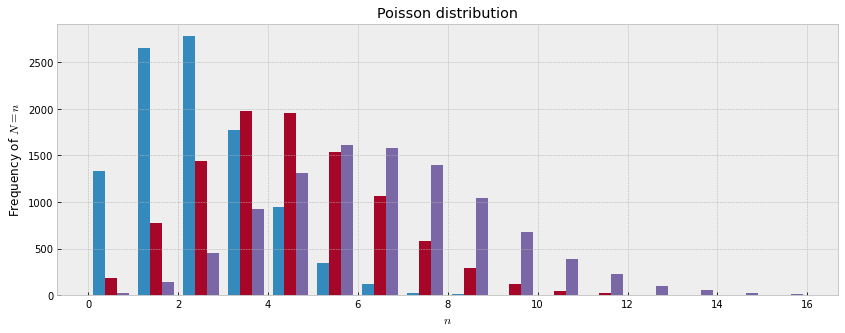

In [14]:
n_bins = np.max([n_bins2, n_bins4,n_bins6])
plt.figure(figsize=(14,5))
plt.hist([samples_mean2, samples_mean4,samples_mean6],n_bins)
plt.xlabel('$n$')
plt.ylabel('Frequency of $N = n$')
plt.title('Poisson distribution')
plt.show() 

## Example of simple queue

- Packets or persons arrive following a Poisson distribution with mean $\lambda$ in a given period of time
- Packets or persons that have arrived service rate follows a Poisson distribution with mean $\mu$
- Can you tell what is the worst case in relation to delay?

### Case 1: Arrivals smaller than service rate

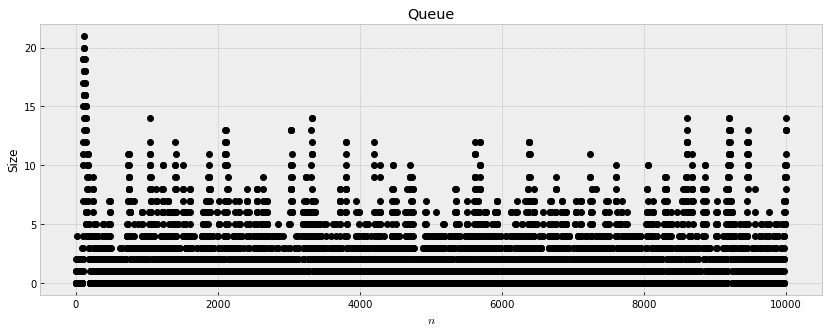

Worst delay: 21.0


In [15]:
#time periods
size=10000
#Arrival
mean=1
arrival = np.random.poisson(mean, size)
#Service
mean=1.5
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Case 2: Arrivals greater than service rate

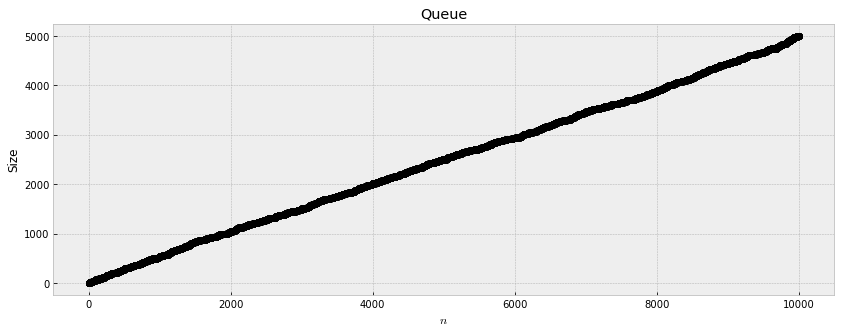

Worst delay: 5000.0


In [16]:
#time periods
size=10000
#Arrival
mean=1.5
arrival = np.random.poisson(mean, size)
#Service
mean=1
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Case 3: Arrivals equal to service rate

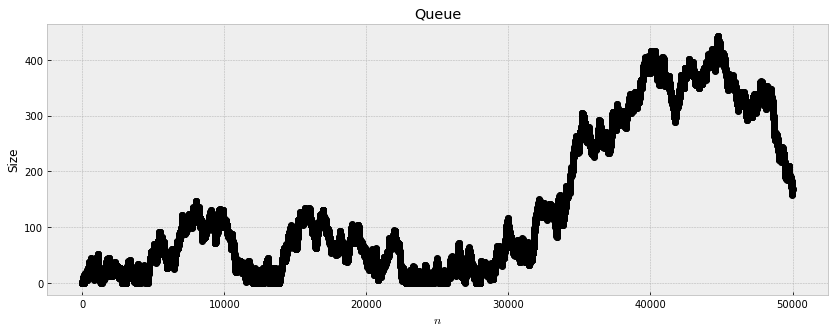

Worst delay: 443.0


In [17]:
#time periods
size=50000
#Arrival
mean=1
arrival = np.random.poisson(mean, size)
#Service
mean=1
service = np.random.poisson(mean, size)
#
queue = np.zeros(size+1)

for i in range(size):
    if ((arrival[i] - service[i]) + queue[i]) > 0:
        queue[i+1] = max(0,(arrival[i] - service[i]) + queue[i])



plt.figure(figsize=(14,5))
#plt.plot( arrival, '--o',label='Arrival')
#plt.plot( service, '-x',label='Sevice')
plt.plot( queue, 'ok')
plt.xlabel('$n$')
plt.ylabel('Size')
plt.title('Queue')
#plt.ylim([0, 1])
#plt.xlim([0, 10])
plt.grid(True) #grid
plt.show() 

print('Worst delay:', np.max(queue))

### Try yourself as follows:
- $\lambda = 1$ and $\mu = 1.1$
- $\lambda = 1.1$ and $\mu = 1$

## To think about

What if:
- The queue has a maximum value (overflow)?
- If some packets are served in error and can be restransmitted? 